In [35]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [36]:
code = "EURUSD"
PreparedDatasetPath = "Datasets_with_Indicators/"+code+".csv"

In [37]:
dataframe = pd.read_csv(code+"_DATASET.csv", parse_dates=True)
dataframe

,Date,Open,High,Low,Close,ZigZag
0,02.01.2000,1.00730,1.01410,1.00730,1.01370,0.00
1,03.01.2000,1.01400,1.02780,1.00540,1.02620,0.00
2,04.01.2000,1.02600,1.03400,1.02130,1.02920,0.00
3,05.01.2000,1.02910,1.04020,1.02840,1.03230,0.00
4,06.01.2000,1.03250,1.04150,1.02720,1.03050,1.04
...,...,...,...,...,...,...
7149,07.12.2022,1.04670,1.05493,1.04427,1.05114,0.00
7150,08.12.2022,1.05115,1.05643,1.04892,1.05551,0.00
7151,09.12.2022,1.05549,1.05878,1.05032,1.05325,0.00
7152,11.12.2022,1.05286,1.05371,1.05176,1.05204,0.00


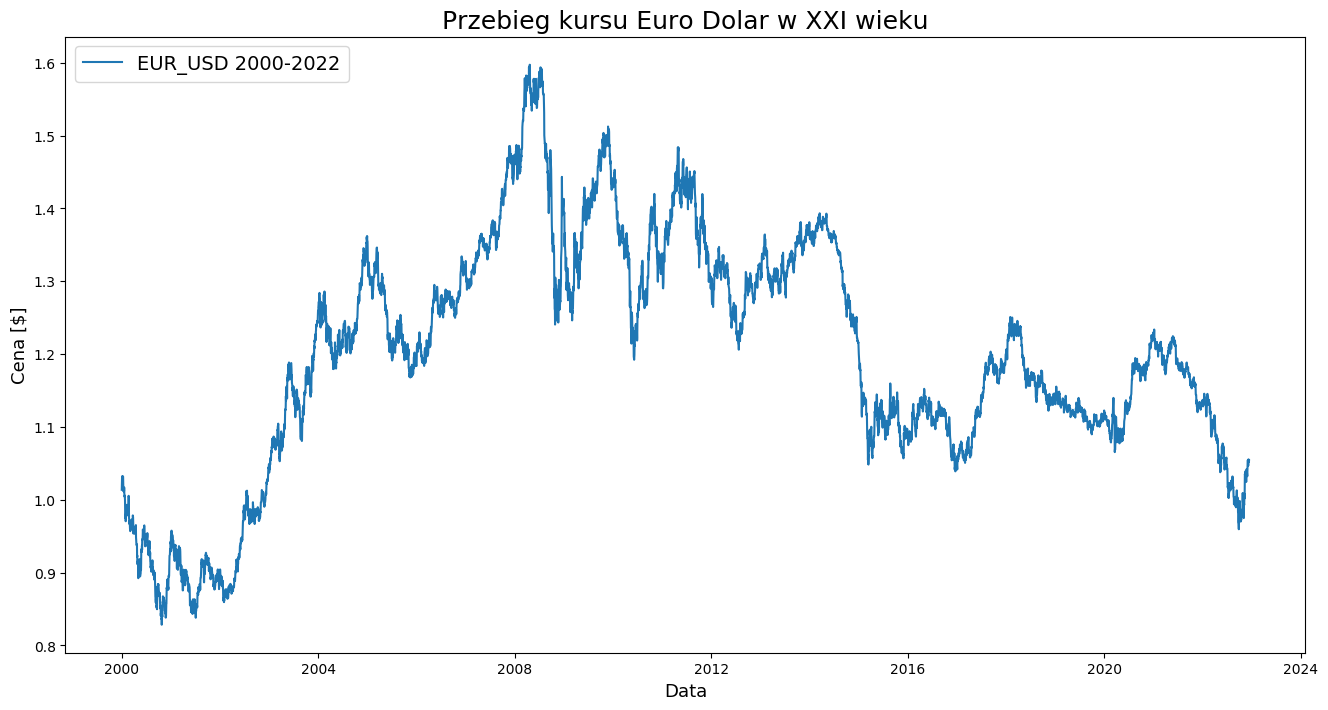

In [38]:
plotDataFrame = pd.DataFrame()
plotDataFrame["Close"] = dataframe["Close"]
plotDataFrame = plotDataFrame.set_index(pd.to_datetime(dataframe["Date"], dayfirst=True))
plt.figure(figsize=(16, 8))
plt.plot(plotDataFrame)
plt.xlabel("Data", fontsize=13)
plt.ylabel("Cena [$]", fontsize=13)
plt.legend(["EUR_USD 2000-2022"], loc="upper left", fontsize=14)
plt.title("Przebieg kursu Euro Dolar w XXI wieku", fontsize=18)
plt.savefig("Figures/Others/EURUSD_2000_2023_basicPlot.png")
plt.show()

In [39]:
## Rising Trend => trend = True || 0
## Downward Trend => trend = False || 1
def checkTrend(df):
    check = False
    trend = False
    i = 0
    while not check:
        if df.ZigZag[i] != 0 and i == 0:
            if df.Close[i] < df.Close[i+1]:
                trend = True
            check = True
        elif df.ZigZag[i] != 0 and i != 0:
            if df.Close[i] > df.Close[0]:
                trend = True
            check = True
        i+=1

    return trend

In [40]:
def changeZigZag(df, startingTrend):
    i = 0
    ## True => FirstBuy => 0
    if startingTrend:
        trend = 0
    ## False => FirstSell => 1
    else:
        trend = 1

    while i<len(df):
        if df.ZigZag[i]!=0:
            if trend==0:
                trend=1
            else:
                trend=0
        df.ZigZag[i] = trend
        i+=1
    return df

In [41]:
def rsi(df, periods, ema):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)

    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [42]:
df = changeZigZag(dataframe.copy(), checkTrend(dataframe.copy()))
df.ZigZag = df.ZigZag.astype('int')
df

,Date,Open,High,Low,Close,ZigZag
0,02.01.2000,1.00730,1.01410,1.00730,1.01370,0
1,03.01.2000,1.01400,1.02780,1.00540,1.02620,0
2,04.01.2000,1.02600,1.03400,1.02130,1.02920,0
3,05.01.2000,1.02910,1.04020,1.02840,1.03230,0
4,06.01.2000,1.03250,1.04150,1.02720,1.03050,1
...,...,...,...,...,...,...
7149,07.12.2022,1.04670,1.05493,1.04427,1.05114,0
7150,08.12.2022,1.05115,1.05643,1.04892,1.05551,0
7151,09.12.2022,1.05549,1.05878,1.05032,1.05325,0
7152,11.12.2022,1.05286,1.05371,1.05176,1.05204,0


In [43]:
df["Return_rate"] = df["Close"]/df["Close"].shift(1)
df["RSI_7"] = rsi(df, 7, True)
df["RSI_14"] = rsi(df, 14, True)
df['MA_7'] = df["Close"].rolling(window=7).mean()
df['MA_14'] = df["Close"].rolling(window=14).mean()
df = df.dropna()
df

,Date,Open,High,Low,Close,ZigZag,Return_rate,RSI_7,RSI_14,MA_7,MA_14
14,18.01.2000,1.01110,1.01550,1.00720,1.01400,1,1.002769,36.106221,41.847381,1.019714,1.024307
15,19.01.2000,1.01410,1.01650,1.00850,1.01170,1,0.997732,32.411299,39.100201,1.016786,1.023271
16,20.01.2000,1.01160,1.01880,1.00730,1.01690,1,1.005140,46.777470,47.492823,1.014700,1.022393
17,21.01.2000,1.01660,1.01930,1.00500,1.00870,1,0.991936,33.627629,38.485863,1.012514,1.020707
18,23.01.2000,1.00280,1.00450,1.00260,1.00430,1,0.995638,28.595350,34.684738,1.011386,1.018836
...,...,...,...,...,...,...,...,...,...,...,...
7149,07.12.2022,1.04670,1.05493,1.04427,1.05114,0,1.004223,64.103095,64.267401,1.050111,1.043287
7150,08.12.2022,1.05115,1.05643,1.04892,1.05551,0,1.004157,69.392195,66.614241,1.052003,1.045037
7151,09.12.2022,1.05549,1.05878,1.05032,1.05325,0,0.997859,63.726914,64.263552,1.052074,1.045859
7152,11.12.2022,1.05286,1.05371,1.05176,1.05204,0,0.998851,60.634794,62.982086,1.051797,1.046666


In [44]:
df.to_csv(("Figures/Others/all_for_presentation.csv"), index=False)

In [45]:
df.to_csv(PreparedDatasetPath, index=False)